**Import Dependencies**

In [ ]:
import math
import cv2
import numpy as np
from PIL import Image, ImageStat
from numpy import asarray
from matplotlib import pyplot as plt

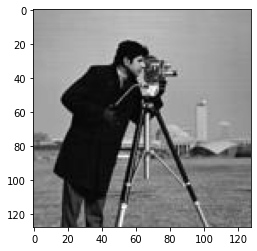

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Camera2.jpg',0)
plt.imshow(img,cmap='gray')

In [ ]:
def LZW_coding_compression(input_img):
  rows = input_img.shape[0]
  cols = input_img.shape[1]

  string_pixels = np.zeros((rows*cols))
  index = 0;

  # making a string of all intensity values
  for i in range(0,rows): 
    for j in range(0,cols):
      string_pixels[index] = input_img[i,j]
      index = index+1
    

  currently_recognized_sequence = ""  # currently recognized sequence
  current_seq = "" # current sequence

  output_seq_dict = {}
  output_dict_idx = 0

  dict1 = {}
  dict_idx = 0

  for i in range(0,256):
      dict1[str(i)] = i
          
  #next location in the codes of dictionary
  dict_idx = 256

  current_seq = string_pixels[0]

  currently_recognized_sequence = str(int(current_seq))

  for i in range(1,index):
    current_seq = string_pixels[i]
    temp_seq = currently_recognized_sequence + "-" + str(int(current_seq))

    # checking if it already exists in the dictionary
    if temp_seq in dict1 :
      currently_recognized_sequence = temp_seq
        
    else:  # if the sequence is not in the dictionary
      output_seq_dict[output_dict_idx] = dict1[currently_recognized_sequence]
      output_dict_idx = output_dict_idx + 1
      currently_recognized_sequence = str(int(current_seq))
      
      # add the new sequence to the dictionary
      dict1[temp_seq] = dict_idx
      dict_idx = dict_idx + 1
    

  # Last sequence is found in the dictionary
  if currently_recognized_sequence in dict1:
    output_seq_dict[output_dict_idx] = dict1[currently_recognized_sequence]
    output_dict_idx = output_dict_idx + 1

  # Regormatting the dictionary
  dict_output = {value:key for key, value in dict1.items()}

  # Storing the output with spaces
  output_string = ""
  for value in output_seq_dict.values():
    output_string = output_string + str(value) + " "

  # Compression 
  bitNo =  np.log(max(output_seq_dict.values()))/np.log(2)
  old_size = 8 * index
  new_size = np.ceil(bitNo) * len(output_seq_dict.values())
  compression_ratio = old_size/new_size


  return dict_output, output_string, compression_ratio



In [ ]:
dictionary_out, output, compressionRatio = LZW_coding_compression(img)

# open file for writing the obtain dictionary
file1 = open("Dict.txt","w")
file1.write(str(dictionary_out))
file1.close()

# open file for writing the output code
file2 = open("LZWCode.txt","w")
file2.write(output)
file2.close()

# open file for writing the compression ratio
file3 = open("CompRatio.txt","w")
file3.write(str(compressionRatio))
file3.close()